<a href="https://colab.research.google.com/github/YungKing1224/Python-data-science/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

The data has 12 Columns and 891 Rows.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As you can see above there are 2 float64, 5 int64 and 5 object data types.



In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum() / len(df) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

# **Notes:**

Cabin has 77.1% missing data you can consider dropping the feature as it has many missing values and if you consider it non-important.

Age has 19.87% missing values you can consider imputing the values using the median as it can be less sensitive to outliers.


Embarked has 0.22% missing values, you can consider using the mode as it is a categorical feature.

In [8]:
## let us make a copy of the data first
df2 = df.copy()
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
df2.drop('Cabin', axis =1, inplace = True)
df2['Age'].fillna(df['Age'].median(), inplace = True)
df2['Embarked'].fillna(df['Embarked'].mode(), inplace = True)
df2.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

As you can see there are no more missing values.

In [10]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [11]:
df['Ticket'].nunique()

681

In [12]:
df['Ticket'].duplicated().sum()

210

Ticket have some duplicated numbers could be justified by passengers traveling together or purchasing group tickets.

In [13]:
df['PassengerId'].duplicated().sum()

0

There are no duplicated values in PassengerID meaning it is okay.

In [14]:
total_survivors = df2[df2['Survived'] == 1].shape[0]
total_survivors

342

# **Total survivors:**

There were 342 survivors according to the dataset.

In [15]:
total_non_survivors = df2[df2['Survived'] == 0].shape[0]
total_non_survivors

549

# **Total non survivors:**

There were 549 non survivors

There observation shows less people survived the titanic.

In [16]:
total_survivors_male = df2[(df2['Survived'] == 1) & (df2['Sex'] == 'male')].shape[0]
total_survivors_male

109

In [17]:
total_survivors_female = df2[(df2['Survived'] == 1) & (df2['Sex'] == 'female')].shape[0]
total_survivors_female

233

There observations shows that more females survived the titanic

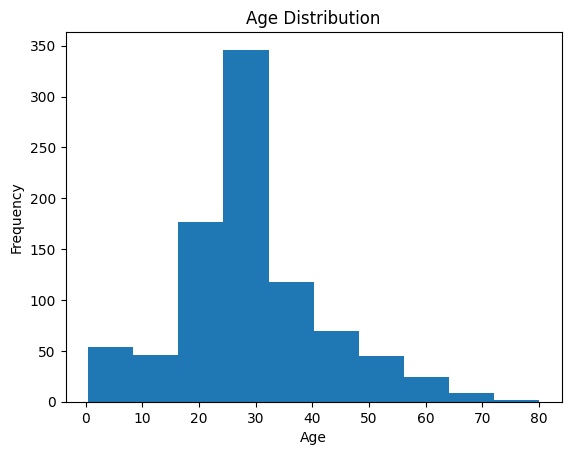

In [18]:
plt.hist(df2['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [19]:
df2['Age'].median()

28.0

The age distribution shows that the median is 28 years as also tested above.

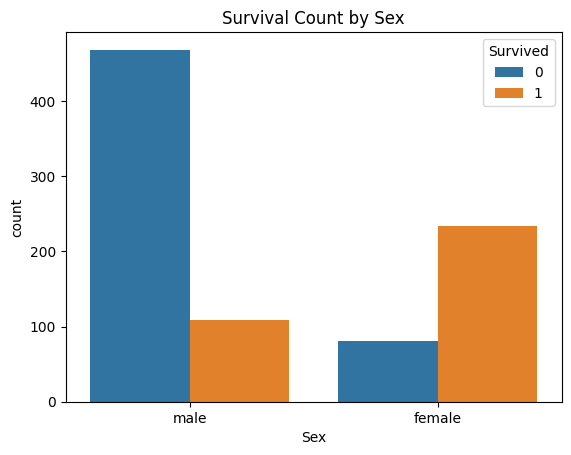

In [20]:
sns.countplot(x='Sex', hue = 'Survived', data =df2)
plt.title('Survival Count by Sex')
plt.show()

According to the data set most survivors of the titanic were females. While males had the most non-survivors. Meaning the data corresponds.

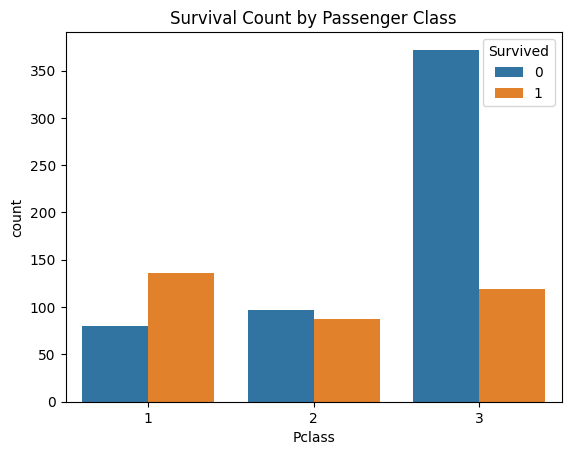

In [21]:
sns.countplot(x='Pclass', hue='Survived', data=df2)
plt.title('Survival Count by Passenger Class')
plt.show()

The observation from this is that most survivors were in the 1st class while most non-survivors are in the 3rd class. The 2nd class has also similar survivors and non-survivors.

In [22]:
df2[df2['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [23]:
df2['Embarked'].fillna(df2['Embarked'].mode().iloc[0], inplace = True)
df2['Embarked'].isna().sum()

0

In [24]:
df2.iloc[61]

PassengerId                     62
Survived                         1
Pclass                           1
Name           Icard, Miss. Amelie
Sex                         female
Age                           38.0
SibSp                            0
Parch                            0
Ticket                      113572
Fare                          80.0
Embarked                         S
Name: 61, dtype: object

In [25]:
df2.iloc[829]

PassengerId                                          830
Survived                                               1
Pclass                                                 1
Name           Stone, Mrs. George Nelson (Martha Evelyn)
Sex                                               female
Age                                                 62.0
SibSp                                                  0
Parch                                                  0
Ticket                                            113572
Fare                                                80.0
Embarked                                               S
Name: 829, dtype: object

row 61 nad 829 still had nan values but I added iloc and imputed using the mode S and checked both the rows if they have been filled successfully which they are. Now we will proceed to plotting the counterplot again.

There was an observation that there was a value 28 in Embarked that is not supposed to be there so we have to remove that value. I had added df2.fillna instead of df2['Embarked'].fillna

In [26]:
df2['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

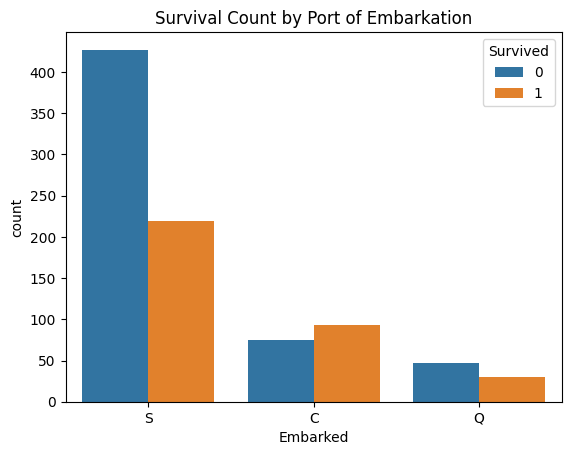

In [27]:
sns.countplot(x='Embarked', hue ='Survived', data =df2)
plt.title('Survival Count by Port of Embarkation')
plt.show()

The observation in this plot is that most passengers emabrked from Southampton. While the least passengers embarked from Queenstown.

Only Queenstown had more survivors than non-survivors in embarked.

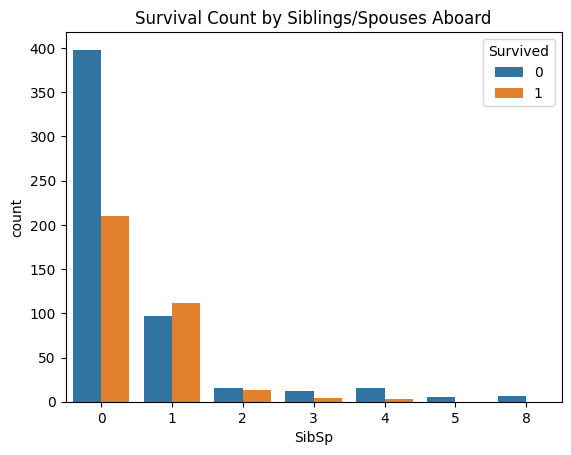

In [28]:
sns.countplot(x='SibSp', hue='Survived', data=df2)
plt.title('Survival Count by Siblings/Spouses Aboard')
plt.show()

Those with no sibling or spouse were the highest number of passengers. The ones with one sibling/spouse are the only ones that had a higher number of survivors over non-survivors.

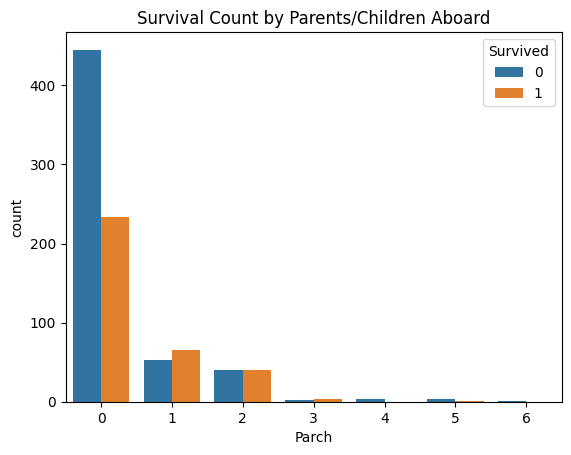

In [29]:
sns.countplot(x='Parch', hue='Survived', data=df2)
plt.title('Survival Count by Parents/Children Aboard')
plt.show()

Fare has a big standard deviation meaning it needs stardardization or normalization. As fare Maintaining the interpretability of the data in the original scale (like currency values) we use min-max normalization.

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df2['Fare_normalized'] = scaler.fit_transform(df[['Fare']])
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_normalized
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.014151
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.139136
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.015469
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.103644
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.015713
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0.025374
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0.058556
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,0.045771
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0.058556


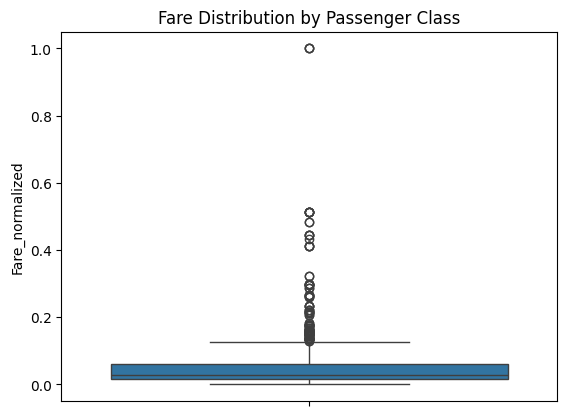

In [31]:
sns.boxplot(y='Fare_normalized', data=df2)
plt.title('Fare Distribution by Passenger Class')
plt.show()

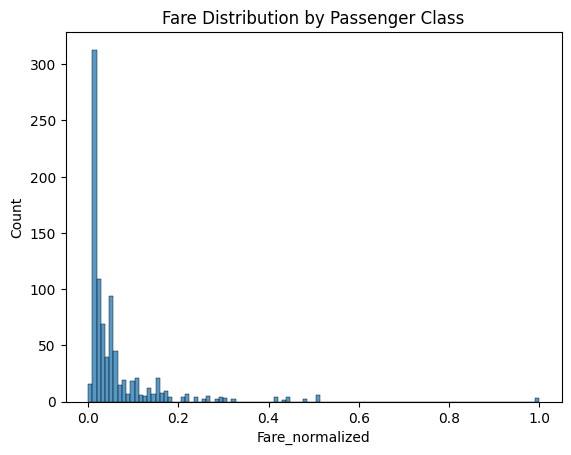

In [32]:
sns.histplot(x='Fare_normalized', data=df2)
plt.title('Fare Distribution by Passenger Class')
plt.show()

Now we will get dummies method to encode all categorical values.

In [33]:
sex_dummmies = pd.get_dummies(df2.Sex, prefix='Sex', drop_first=True).astype(int)
sex_dummmies

,Sex_male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [34]:
pclass_dummies = pd.get_dummies(df2.Pclass, prefix='Pclass', drop_first=True).astype(int)
pclass_dummies

,Pclass_2,Pclass_3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [35]:
embarked_dummies = pd.get_dummies(df2.Embarked, prefix='Embarked', drop_first=True).astype(int)
embarked_dummies

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


Conbine tables and drop Sex, pclass and embarked

In [36]:
combined = pd.concat([df2, sex_dummmies, pclass_dummies, embarked_dummies], axis=1)
combined

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_normalized,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.014151,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.139136,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.015469,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.103644,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.015713,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0.025374,1,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0.058556,0,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,0.045771,0,0,1,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0.058556,1,0,0,0,0


In [37]:
df2 = combined.drop(['Sex', 'Pclass', 'Embarked'], axis=1)
df2

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Fare_normalized,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0.014151,1,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0.139136,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0.015469,0,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0.103644,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0.015713,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,0.025374,1,1,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,0.058556,0,0,0,0,1
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,0.045771,0,0,1,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,0.058556,1,0,0,0,0


As you can see sex has now been encoded.

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Name             891 non-null    object 
 3   Age              891 non-null    float64
 4   SibSp            891 non-null    int64  
 5   Parch            891 non-null    int64  
 6   Ticket           891 non-null    object 
 7   Fare             891 non-null    float64
 8   Fare_normalized  891 non-null    float64
 9   Sex_male         891 non-null    int64  
 10  Pclass_2         891 non-null    int64  
 11  Pclass_3         891 non-null    int64  
 12  Embarked_Q       891 non-null    int64  
 13  Embarked_S       891 non-null    int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 97.6+ KB


Now we will drop all features that are not needed such as PassengerID, Name, etc.

In [39]:
df3 = df2.drop(['PassengerId', 'Name', 'Ticket', 'Fare'], axis = 1)
df3

,Survived,Age,SibSp,Parch,Fare_normalized,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,22.0,1,0,0.014151,1,0,1,0,1
1,1,38.0,1,0,0.139136,0,0,0,0,0
2,1,26.0,0,0,0.015469,0,0,1,0,1
3,1,35.0,1,0,0.103644,0,0,0,0,1
4,0,35.0,0,0,0.015713,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,0.025374,1,1,0,0,1
887,1,19.0,0,0,0.058556,0,0,0,0,1
888,0,28.0,1,2,0.045771,0,0,1,0,1
889,1,26.0,0,0,0.058556,1,0,0,0,0


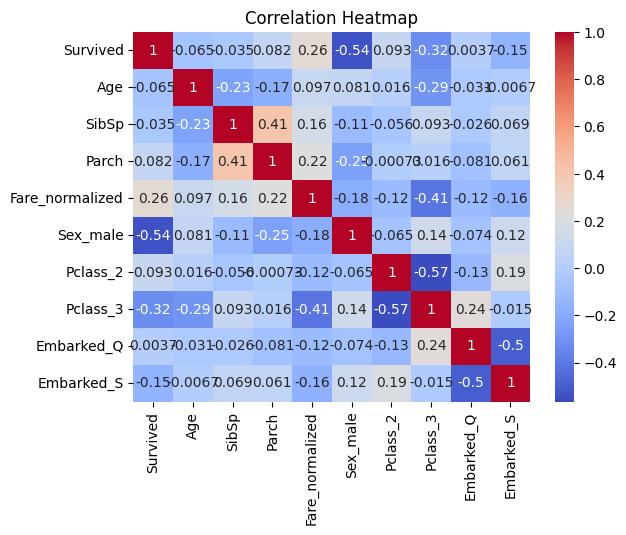

In [40]:
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Based on the heatmap, Pclass, Sex, Embarked, and Fare_normalized have the stronger correlation compared to the others which had weaker correaltion such as Age, SibSp and Parch. I have decided to keep Age just to test.


Pclass and Fare_normalized are highly correlated to avoid redundency and multicollinearity we will remove the less correlated to Survived which is Fare_normalized.

Parch and SibSp are also closely correlated so we will removed the least correlated to Survived. Meaning we drop SibSp. I have also decided to keep one of Parch and SibSp.

In [134]:
age_min_quantile = df3.Age.quantile(0.05)
age_max_quantile = df3.Age.quantile(0.95)
df3 = df3[(df3.Age >= age_min_quantile) & (df3.Age <= age_max_quantile)]
df3

,Survived,Age,SibSp,Parch,Fare_normalized,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
2,1,26.0,0,0,0.015469,0,0,1,0,1
5,0,28.0,0,0,0.016510,1,0,1,1,0
8,1,27.0,0,2,0.021731,0,0,1,0,1
17,1,28.0,0,0,0.025374,1,1,0,0,1
18,0,31.0,1,0,0.035134,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
868,0,28.0,0,0,0.018543,1,0,1,0,1
870,0,26.0,0,0,0.015412,1,0,1,0,1
878,0,28.0,0,0,0.015412,1,0,1,0,1
883,0,28.0,0,0,0.020495,1,1,0,0,1


In [135]:
fare_normalized_max = df3.Fare_normalized.quantile(0.95)
fare_normalized_min = df3.Fare_normalized.quantile(0.05)
df3 = df3[(df3.Fare_normalized >= fare_normalized_min) & (df3.Fare_normalized <= fare_normalized_max)]
df3

,Survived,Age,SibSp,Parch,Fare_normalized,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
2,1,26.0,0,0,0.015469,0,0,1,0,1
5,0,28.0,0,0,0.016510,1,0,1,1,0
8,1,27.0,0,2,0.021731,0,0,1,0,1
17,1,28.0,0,0,0.025374,1,1,0,0,1
29,0,28.0,0,0,0.015412,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
868,0,28.0,0,0,0.018543,1,0,1,0,1
870,0,26.0,0,0,0.015412,1,0,1,0,1
878,0,28.0,0,0,0.015412,1,0,1,0,1
883,0,28.0,0,0,0.020495,1,1,0,0,1


In [136]:
df4 = df3
df4

,Survived,Age,SibSp,Parch,Fare_normalized,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
2,1,26.0,0,0,0.015469,0,0,1,0,1
5,0,28.0,0,0,0.016510,1,0,1,1,0
8,1,27.0,0,2,0.021731,0,0,1,0,1
17,1,28.0,0,0,0.025374,1,1,0,0,1
29,0,28.0,0,0,0.015412,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
868,0,28.0,0,0,0.018543,1,0,1,0,1
870,0,26.0,0,0,0.015412,1,0,1,0,1
878,0,28.0,0,0,0.015412,1,0,1,0,1
883,0,28.0,0,0,0.020495,1,1,0,0,1


Below we will split theb data into test and train data sets.

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
x = df4.drop('Survived', axis = 1)
y = df4['Survived']

x is the training set while y is the target.

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

split the data into 80/20.

In [140]:
from sklearn.linear_model import LogisticRegression

In [141]:
model = LogisticRegression()
model

LogisticRegression()

In [142]:
model.fit(x_train, y_train)

LogisticRegression()

linear regression model has been trained it is time to predict using the model and test the accuracy.

In [143]:
y_pred = model.predict(x_test)

In [144]:
model.score(x_test, y_test)

0.8709677419354839

# **Note:**

Previously I had dropped SibSp and Fare_normalized which gave me a score of 79.9% accuracy. I included them and also removed age outliers by removing rows with age below 5% quantile and age above 95% quantile. The score improved to 85%.


I then removed Fare_normalized row below 5% quantile and above 95% quantile.

The score improved to 87%.